In [204]:
!pip install skillsnetwork

In [205]:
# Import block so I don't have to rerun code to create the df
# every time a new feature is introduced

import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns
from scipy import stats
import skillsnetwork
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Ridge
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV


In [206]:
# import pandas library
"""
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns
from scipy import stats

# Piplite not found, installing skillsnetwork in cell above
# import piplite
# await piplite.install('skillsnetwork')

# Comment block out when importing new modules
# Next time we will have modules in its own cell

import skillsnetwork
"""
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
await skillsnetwork.download(filepath,'./usedcars.csv')
path = './usedcars.csv'
df = pd.read_csv(path, header=None)


Saved as 'usedcars.csv'


In [207]:
# Display the first five rows of the dataset

print("The first 5 rows of the dataframe are:")
df.head()

The first 5 rows of the dataframe are:


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [208]:
# Display the last 10 rows of the dataset

print("The last 10 rows of the dataframe are:")
df.tail(10)

The last 10 rows of the dataframe are:


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
195,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415
196,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985
197,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515
198,-2,103,volvo,gas,turbo,four,sedan,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420
199,-1,74,volvo,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [209]:
# Create and assign headers to the dataset

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
# print("headers\n", headers)
df.columns = headers
print("Column Names:")
print(df.columns)
# Confirmation of headers applied
# df.head()

Column Names:
Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


In [210]:
# Replace data with a questionmark as "NaN" so the "dropna()" function can work
# properly to remove missing values

df1=df.replace('?',np.nan)

In [211]:
# Thanks to the above function, we can drop columns that are missing the price
# By indicating "axis=0" we drop the entire row when the price is missing
# axis = 1 will drop the entire COLUMN
# inplace = True will overwrite the current dataframe itself instead of
# using an intersect value as demonstrated here

df = df1.dropna(subset=["price"], axis=0)
df.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [212]:
# Display the type of data listed in each column

print(df.dtypes)

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


In [213]:
# Dataframe Describe
# The describe method will return a statistical summary of a columns containing
# either an integer or float value

print("Statistical summary of number fields:\n")
print(df.describe())

Statistical summary of number fields:

        symboling  wheel-base      length       width      height  \
count  201.000000  201.000000  201.000000  201.000000  201.000000   
mean     0.840796   98.797015  174.200995   65.889055   53.766667   
std      1.254802    6.066366   12.322175    2.101471    2.447822   
min     -2.000000   86.600000  141.100000   60.300000   47.800000   
25%      0.000000   94.500000  166.800000   64.100000   52.000000   
50%      1.000000   97.000000  173.200000   65.500000   54.100000   
75%      2.000000  102.400000  183.500000   66.600000   55.500000   
max      3.000000  120.900000  208.100000   72.000000   59.800000   

       curb-weight  engine-size  compression-ratio    city-mpg  highway-mpg  
count   201.000000   201.000000         201.000000  201.000000   201.000000  
mean   2555.666667   126.875622          10.164279   25.179104    30.686567  
std     517.296727    41.546834           4.004965    6.423220     6.815150  
min    1488.000000    61.00

In [214]:
# By adding the "include="all"" argument, we will also return information on
# Non-numerical columns

print("Statistical summary of all fields:\n")
print(df.describe(include="all"))

Statistical summary of all fields:

         symboling normalized-losses    make fuel-type aspiration  \
count   201.000000               164     201       201        201   
unique         NaN                51      22         2          2   
top            NaN               161  toyota       gas        std   
freq           NaN                11      32       181        165   
mean      0.840796               NaN     NaN       NaN        NaN   
std       1.254802               NaN     NaN       NaN        NaN   
min      -2.000000               NaN     NaN       NaN        NaN   
25%       0.000000               NaN     NaN       NaN        NaN   
50%       1.000000               NaN     NaN       NaN        NaN   
75%       2.000000               NaN     NaN       NaN        NaN   
max       3.000000               NaN     NaN       NaN        NaN   

       num-of-doors body-style drive-wheels engine-location  wheel-base  ...  \
count           199        201          201            

In [215]:
# Columns can also be selected by referring to them by name
# We can combine this with the describe method to evaluate specific columns

df[['length','compression-ratio']].describe()

,length,compression-ratio
count,201.000000,201.000000
mean,174.200995,10.164279
std,12.322175,4.004965
min,141.100000,7.000000
25%,166.800000,8.600000
50%,173.200000,9.000000
75%,183.500000,9.400000
max,208.100000,23.000000


In [216]:
# The info method will provide an overview of the data
# Note: printing does not seem to change format or disply like it
# does other with methods

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non-null

In [217]:
# Evaluating missing data
# We can find missing data using the isnull method
# The output is the dataframe, but with True where there is no data
# and False where there is data
# The converse is the notnull method
# True = data, False = no data

missing_data = df.isnull()
missing_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [218]:
# Loop to count the number of cells that contain data per column

for column in missing_data:
  print(column)
  print(missing_data[column].value_counts())
  print("")

symboling
symboling
False    201
Name: count, dtype: int64

normalized-losses
normalized-losses
False    164
True      37
Name: count, dtype: int64

make
make
False    201
Name: count, dtype: int64

fuel-type
fuel-type
False    201
Name: count, dtype: int64

aspiration
aspiration
False    201
Name: count, dtype: int64

num-of-doors
num-of-doors
False    199
True       2
Name: count, dtype: int64

body-style
body-style
False    201
Name: count, dtype: int64

drive-wheels
drive-wheels
False    201
Name: count, dtype: int64

engine-location
engine-location
False    201
Name: count, dtype: int64

wheel-base
wheel-base
False    201
Name: count, dtype: int64

length
length
False    201
Name: count, dtype: int64

width
width
False    201
Name: count, dtype: int64

height
height
False    201
Name: count, dtype: int64

curb-weight
curb-weight
False    201
Name: count, dtype: int64

engine-type
engine-type
False    201
Name: count, dtype: int64

num-of-cylinders
num-of-cylinders
False    201
Nam

In [219]:
# Dealing with missing data
# Drop missing data
# If cells are missing data, we can either drop the row or column (covered above)
# Replace missing data
# We can replace the data using a few methods
# External research or knowledge
# Frequency: Missing Object types can be replaced with the most common value
# Mean: We can replace missing data with the average for the column

# Replacing 41 missing information fields in Normalized Losses
# Find the average of the column

avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

# Replace NaN with the average
# Old method?
# df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)
# New method
df.fillna(value={"normalized-losses":avg_norm_loss}, inplace=True)
df

Average of normalized-losses: 122.0


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [220]:
# Repeat process for bore, stroke, horsepower, peak-rpm

avg_bore = df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

df["bore"].replace(np.nan, avg_bore, inplace=True)

avg_stroke = df['stroke'].astype('float').mean(axis=0)
print('Average stroke:', avg_stroke)

df['stroke'].replace(np.nan, avg_stroke, inplace=True)

avg_hp = df['horsepower'].astype('float').mean(axis=0)
print("average horsepower:", avg_hp)

df.fillna(value={"horsepower":avg_hp}, inplace=True)

avg_rpm = df['peak-rpm'].astype('float').mean(axis=0)
print("Average Peak RPM:", avg_rpm)

df.fillna(value={'peak-rpm':avg_rpm}, inplace=True)

Average of bore: 3.330710659898477
Average stroke: 3.256903553299492
average horsepower: 103.39698492462311
Average Peak RPM: 5117.587939698493


In [221]:
# For Objects, we can find the most common value and
# substitute this data into missing fields

df['num-of-doors'].value_counts()
door_freq = df['num-of-doors'].value_counts().idxmax()
# print("The most common number of doors is", door_freq)
# df.fillna({value='num-of-doors':door_freq} inplace=True)
df['num-of-doors'].replace(np.nan, door_freq, inplace=True)

In [222]:
# Formatting Data
# First list the current types and identify potential mismatches
df.dtypes

,0
symboling,int64
normalized-losses,object
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


In [223]:
# Next, cast the columns to the correct type
df[['bore','stroke']]=df[['bore','stroke']].astype('float')
df[['normalized-losses']]=df[['normalized-losses']].astype('int')
df[['price']] = df[['price']].astype('float')
df[['peak-rpm']]=df[['peak-rpm']].astype('float')

# New method?
# df.loc['price']=df[['price']].astype('float')
# Maybe?

In [224]:
# Data Standardization
# Sometimes we need to convert units or make the data more readable
# For example, if we wanted to convert mpg to L/100km

df['city-L/100km'] = 235/df['city-mpg']
df['highway-L/100km'] = 235/df['highway-mpg']
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818


In [225]:
# Data Normalization
# Data can be of vastly different values, so normalizing the data will help
# establish relationships without bigger numbers such as salary
# overly influence smaller numbers, like height

# There are three main methods for normalization, dividing by the max,
# min-maxing, and Z scoring

# Dividing by the max just provides a ratio of the value versus the max
# df['length'] = df['length']/df['length'].max()

# Min-Maxing subtracts the smallest value from the numerator and denominator above
# df['length'] = (df['length'] - df['length'].min())/(df['length'].max() - df['length'].min())

# Z-Scoring takes the field, subtracts the mean, and divides it all by the stddev
# df['length'] = (df['length'] - df['length'].mean(axis=0))/df['length'].stddev()

# I personally think I like Min Maxing the most, then Z score

df['length'] = (df['length'] - df['length'].min())/(df['length'].max() - df['length'].min())
df['width'] = (df['width'] - df['width'].min())/(df['width'].max() - df['width'].min())
df['height'] = (df['height'] - df['height'].min())/(df['height'].max() - df['height'].min())

In [226]:
print(df['length'], df['length'], df['height'])

0      0.413433
1      0.413433
2      0.449254
3      0.529851
4      0.529851
         ...   
200    0.711940
201    0.711940
202    0.711940
203    0.711940
204    0.711940
Name: length, Length: 201, dtype: float64 0      0.413433
1      0.413433
2      0.449254
3      0.529851
4      0.529851
         ...   
200    0.711940
201    0.711940
202    0.711940
203    0.711940
204    0.711940
Name: length, Length: 201, dtype: float64 0      0.083333
1      0.083333
2      0.383333
3      0.541667
4      0.541667
         ...   
200    0.641667
201    0.641667
202    0.641667
203    0.641667
204    0.641667
Name: height, Length: 201, dtype: float64


In [227]:
# Binning compartmentalizes data into bins or buckets
# This makes it easier to compare data as groups instead of individual points

# Ensure that that column is of the correct type
df['horsepower']=df['horsepower'].astype(int, copy=True)

Text(0.5, 1.0, 'Horsepower Bins')

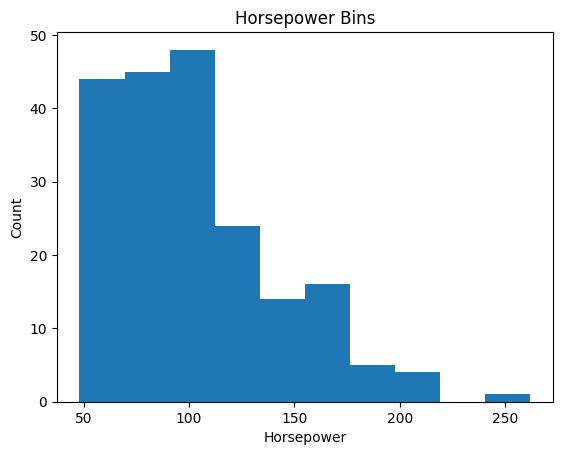

In [228]:
# Visualize the current range of data in the horsepower column
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("Horsepower")
plt.pyplot.ylabel("Count")
plt.pyplot.title("Horsepower Bins")

In [229]:
# If we want to create three equal bins, we run a linespace on the column
# Notice the divider is equal to number of desired bins + 1
horsepower_bins = np.linspace(min(df['horsepower']), max(df['horsepower']), 4)
horsepower_bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [230]:
horsepower_bin_names = ['Low', 'Medium', 'High']

In [231]:
# This command will sort the data in the horsepower column into the appropriate
# bin and update the new column with the bin name
df['horsepower-binned'] = pd.cut(df['horsepower'], horsepower_bins, labels=horsepower_bin_names, include_lowest=True)
df[['horsepower', 'horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
10,101,Low


In [232]:
df['horsepower-binned'].value_counts()

,count
horsepower-binned,
Low,153
Medium,43
High,5


Text(0.5, 1.0, 'Horsepower Bins')

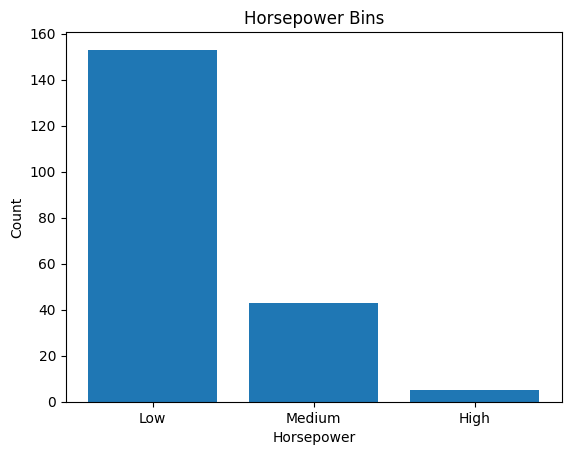

In [233]:
# Plot the distribution of the bins
pyplot.bar(horsepower_bin_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("Horsepower")
plt.pyplot.ylabel("Count")
plt.pyplot.title("Horsepower Bins")

Text(0.5, 1.0, 'horsepower bins')

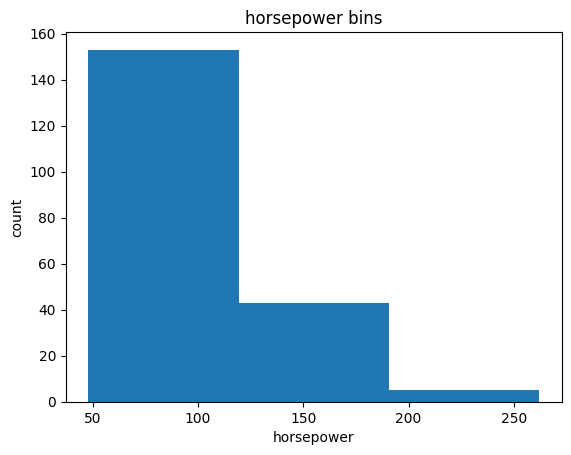

In [234]:
# For pure visualization purposes you can just use the bins parameter

# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [235]:
# Dummy Variables
# Regression does not understand words, just numbers. Dummy variables create new
# columns and assign numbers to them to indicate text where there are only
# a few unique values

# For example, Fuel Type is either Gas or Diesel, but the machine cannot
# understand and make decisions on that

dummy_variable_1 = pd.get_dummies(df['fuel-type'])
dummy_variable_1.rename(columns={'gas': 'fuel-type-gas', 'diesel': 'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


In [236]:
# Once we have the dummy table, we can merge it into the dataframe and
# drop the original column

df = pd.concat([df, dummy_variable_1], axis=1)
df.drop('fuel-type', axis=1, inplace=True)
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.413433,...,111,5000.0,21,27,13495.0,11.190476,8.703704,Low,False,True
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.413433,...,111,5000.0,21,27,16500.0,11.190476,8.703704,Low,False,True
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.449254,...,154,5000.0,19,26,16500.0,12.368421,9.038462,Medium,False,True
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.529851,...,102,5500.0,24,30,13950.0,9.791667,7.833333,Low,False,True
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.529851,...,115,5500.0,18,22,17450.0,13.055556,10.681818,Low,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.711940,...,114,5400.0,23,28,16845.0,10.217391,8.392857,Low,False,True
201,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.711940,...,160,5300.0,19,25,19045.0,12.368421,9.400000,Medium,False,True
202,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.711940,...,134,5500.0,18,23,21485.0,13.055556,10.217391,Medium,False,True
203,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.711940,...,106,4800.0,26,27,22470.0,9.038462,8.703704,Low,True,False


In [237]:
dummy_variable_2 = pd.get_dummies(df['aspiration'])
dummy_variable_2.rename(columns={'std': 'aspiration-std', 'turbo':'aspiration-turbo'},inplace=True)
dummy_variable_2.head()

,aspiration-std,aspiration-turbo
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


In [238]:
df = pd.concat([df, dummy_variable_2], axis=1)
df.drop('aspiration', axis=1, inplace=True)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.413433,0.324786,...,21,27,13495.0,11.190476,8.703704,Low,False,True,True,False
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.413433,0.324786,...,21,27,16500.0,11.190476,8.703704,Low,False,True,True,False
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.449254,0.444444,...,19,26,16500.0,12.368421,9.038462,Medium,False,True,True,False
3,2,164,audi,four,sedan,fwd,front,99.8,0.529851,0.504274,...,24,30,13950.0,9.791667,7.833333,Low,False,True,True,False
4,2,164,audi,four,sedan,4wd,front,99.4,0.529851,0.521368,...,18,22,17450.0,13.055556,10.681818,Low,False,True,True,False


In [239]:
# Save progress
df.to_csv('cleaned_df.csv')

In [240]:
df.dtypes

,0
symboling,int64
normalized-losses,int64
make,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64
length,float64
width,float64


In [241]:
# Visualizing data to identify patterns

# The correlation between numerical fields can be found using the corr method
# This is the Pearson Correlation
# The Pearson coef (returned value) falls between -1 and 1
# Values close to 1 or -1 imply correlation
# Values close to 0 imply no correlation

df[['bore','peak-rpm','stroke','compression-ratio','horsepower']].corr()

,bore,peak-rpm,stroke,compression-ratio,horsepower
bore,1.000000,-0.267338,-0.055390,0.001250,0.566786
peak-rpm,-0.267338,1.000000,-0.063720,-0.435721,0.107882
stroke,-0.055390,-0.063720,1.000000,0.187854,0.097598
compression-ratio,0.001250,-0.435721,0.187854,1.000000,-0.214392
horsepower,0.566786,0.107882,0.097598,-0.214392,1.000000


,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


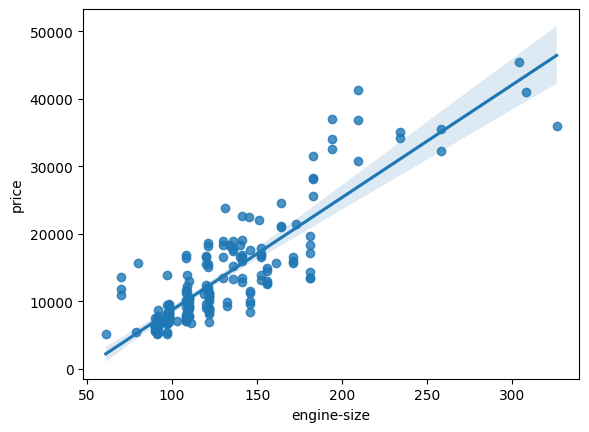

In [242]:
# Scatterplots
# Using the seaborn regplot method, we can visualize the relationship between
# two numeric columns
# The standard format is to plot the potential indicator on the x-axis
# That means the target column is on the y-axis

sns.regplot(x='engine-size', y='price', data=df)
df[['engine-size', 'price']].corr()

In [243]:
# The nearly perfectly diagonal line indicates a strong correlation, much like
# the 0.87 correlation value
# E.G. as the size of the engine goes up, so too does the price

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


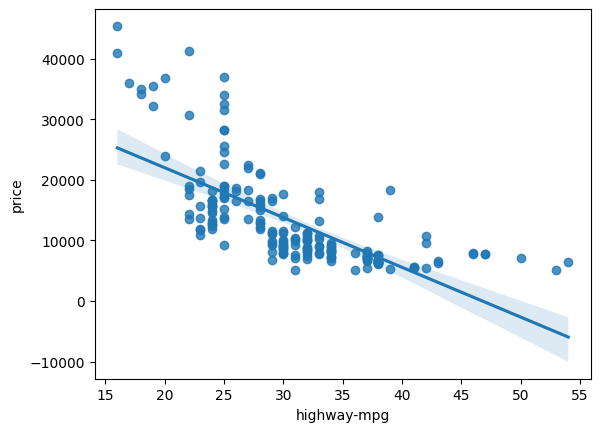

In [244]:
sns.regplot(x='highway-mpg', y='price', data=df)
df[['highway-mpg', 'price']].corr()

In [245]:
# This displays a moderatly strong negative correlation
# Meaning that as highway mpg goes up, the price tends to go down

,peak-rpm,price
peak-rpm,1.000000,-0.101542
price,-0.101542,1.000000


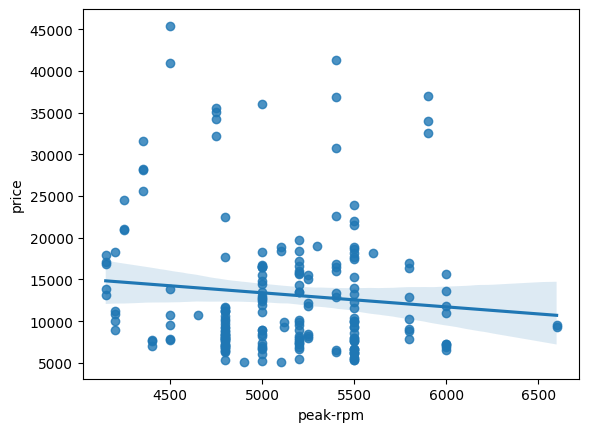

In [246]:
sns.regplot(x='peak-rpm', y='price', data=df)
df[['peak-rpm', 'price']].corr()

In [247]:
# The almost horizontal line, and indeed the points tell a different story
# This chart and the low correlation value indicate that there is almost
# no correlation between the two fields

,stroke,price
stroke,1.000000,0.082267
price,0.082267,1.000000


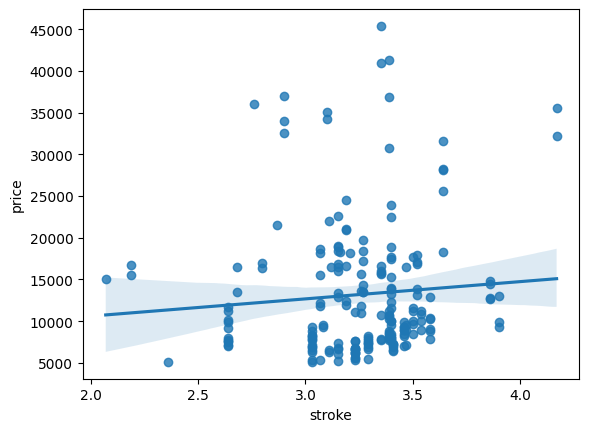

In [248]:
sns.regplot(x='stroke', y='price', data=df)
df[['stroke', 'price']].corr()

<Axes: xlabel='body-style', ylabel='price'>

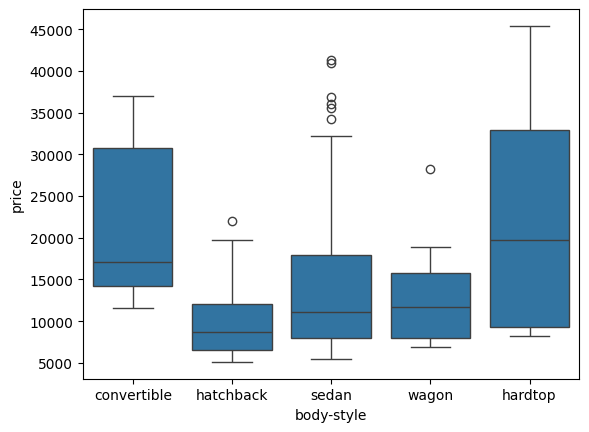

In [249]:
# Categorical variables
# These describe a characteristic of a unit
# Can be Object or Int
# Typically shown in a box plat

sns.boxplot(x='body-style', y='price',data=df)

In [250]:
# Because the boxes are all in line with each other, body style
# is not a good indicator of the price of a vehicle

<Axes: xlabel='engine-location', ylabel='price'>

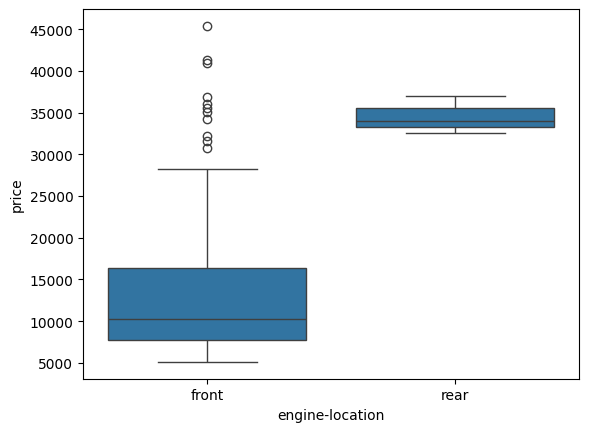

In [251]:
sns.boxplot(x='engine-location', y='price', data=df)

In [252]:
# The significant difference in boxes shows that this could be an indicator

<Axes: xlabel='drive-wheels', ylabel='price'>

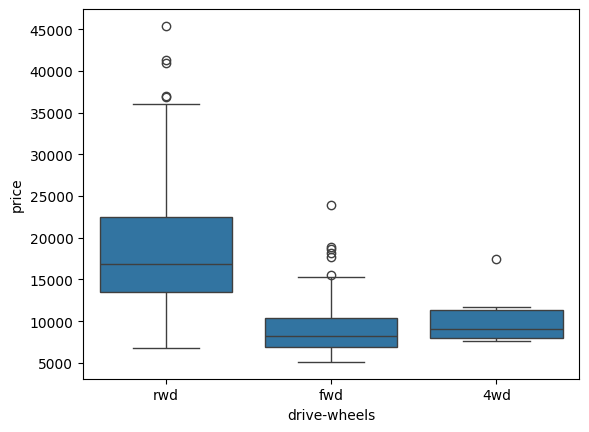

In [253]:
sns.boxplot(x='drive-wheels', y='price', data=df)

In [254]:
# There is some difference in the boxes, so this could be an indicator

In [255]:
# Statistical Analysis
# Describe (as mentioned above) provides a statistcal analysis of the columns
# Numeric columns return average, stddev, min, max, and quartile numbers

df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.494045,0.477697,0.497222,2555.666667,126.875622,3.330711,3.256904,10.164279,103.393035,5117.587940,25.179104,30.686567,13207.129353,9.944145,8.044957
std,1.254802,31.99625,6.066366,0.183913,0.179613,0.203985,517.296727,41.546834,0.268072,0.316048,4.004965,37.365623,478.113178,6.423220,6.815150,7947.066342,2.534599,1.840739
min,-2.000000,65.00000,86.600000,0.000000,0.000000,0.000000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,4.351852
25%,0.000000,101.00000,94.500000,0.383582,0.324786,0.350000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,6.911765
50%,1.000000,122.00000,97.000000,0.479104,0.444444,0.525000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5117.587940,24.000000,30.000000,10295.000000,9.791667,7.833333
75%,2.000000,137.00000,102.400000,0.632836,0.538462,0.641667,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,9.400000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,14.687500


In [256]:
# The include object will create a separate table of only the object columns
# Rows are the number of unique values, the most frequent choice, and how
# often that choice was used

df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8
top,toyota,four,sedan,fwd,front,ohc,four,mpfi
freq,32,115,94,118,198,145,157,92


In [257]:
# Value Counts can add more information by displaying the unique options and
# how often each option was used

df['drive-wheels'].value_counts()

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [258]:
# Value counts can also be formatted into their own dataframe

drive_wheel_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheel_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheel_counts.index.name='drive-wheels'
drive_wheel_counts

,count
drive-wheels,
fwd,118
rwd,75
4wd,8


In [259]:
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name='engine-location'
engine_loc_counts.head(10)

,count
engine-location,
front,198
rear,3


In [260]:
# Grouping
# Grouping will separate averages out based on characteristics

df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [261]:
# This will display the average price based on the drive terrain only
df_group_one = df[['drive-wheels', 'price']]
df_group_one = df_group_one.groupby(['drive-wheels'], as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [262]:
# This will display the average price based on both drive terrain and body style

df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [263]:
# This may be easier to visualize in a pivot table

grouped_pivot = grouped_test1.pivot(index='drive-wheels', columns='body-style')
# This may bring back some cells without data which must be filled
# Good practice is to replace them with a zero
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [264]:
group2 = df[['body-style', 'price']]
grouped_test2 = group2.groupby(['body-style'], as_index=False).mean()
grouped_test2

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


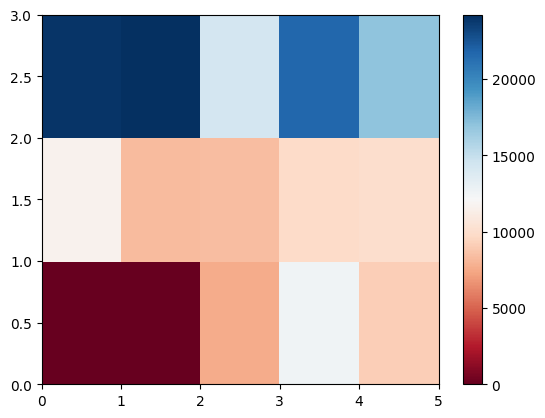

In [265]:
# We can plot these pivot tables as heatmaps

pyplot.pcolor(grouped_pivot, cmap='RdBu')
pyplot.colorbar()
pyplot.show()

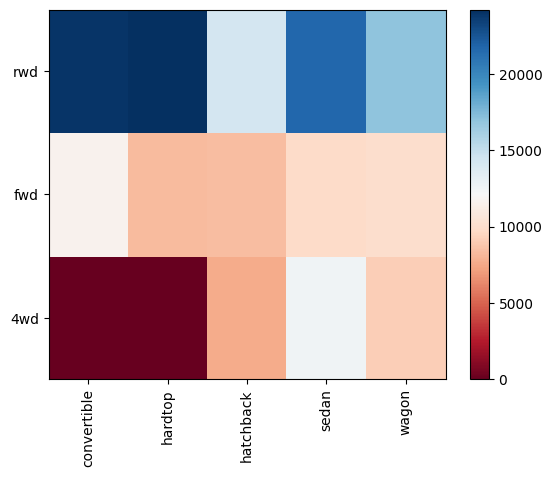

In [266]:
# Now we need to make labels so this is actually useful

fig, ax = pyplot.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

# Labels
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

# Move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

# Insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

# Rotate label if too long
pyplot.xticks(rotation=90)

fig.colorbar(im)
pyplot.show()

In [267]:
# Correlation and Causation
# Just becuase there is a correlation does not mean that one causes the other

In [268]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print(f'The Pearson coefficient is {pearson_coef} and the \
P Value is {p_value}.')

The Pearson coefficient is 0.5846418222655081 and the P Value is 8.076488270732947e-20.


In [269]:
# The Pearson coefficient is not very strong, so not likely correlated
# The P Value is very small, so the relationship is statistically significant

In [270]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print(f'The Pearson coefficient is {pearson_coef} and the \
P Value is {p_value}.')

The Pearson coefficient is 0.8097290352560287 and the P Value is 5.924001027592739e-48.


In [271]:
# This example has a high Pearson and small P Value
# This means that the columns are correlated and this is significant

In [272]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print(f'The Pearson coefficient is {pearson_coef} and the \
P Value is {p_value}.')

The Pearson coefficient is 0.6906283804483642 and the P Value is 8.016477466158771e-30.


In [273]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print(f'The Pearson coefficient is {pearson_coef} and the \
P Value is {p_value}.')

The Pearson coefficient is 0.7512653440522673 and the P Value is 9.200335510482045e-38.


In [274]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print(f'The Pearson coefficient is {pearson_coef} and the \
P Value is {p_value}.')

The Pearson coefficient is 0.8344145257702845 and the P Value is 2.1895772388939584e-53.


In [275]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print(f'The Pearson coefficient is {pearson_coef} and the \
P Value is {p_value}.')

The Pearson coefficient is 0.8723351674455185 and the P Value is 9.265491622198827e-64.


In [276]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print(f'The Pearson coefficient is {pearson_coef} and the \
P Value is {p_value}.')

The Pearson coefficient is 0.5431537659807733 and the P Value is 8.051208825441065e-17.


In [277]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print(f'The Pearson coefficient is {pearson_coef} and the \
P Value is {p_value}.')

The Pearson coefficient is -0.6865710067844679 and the P Value is 2.3211320655674997e-29.


In [278]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print(f'The Pearson coefficient is {pearson_coef} and the \
P Value is {p_value}.')

The Pearson coefficient is -0.7046922650589529 and the P Value is 1.749547114447669e-31.


In [279]:
# ANOVA
# Analysis of Variance
# Tests significant differences between two or more groups
# Returns F-Test Score and P Value
# F-Test calculates how much the averages differ per option
# The larger the F-Test the larger the difference between the means of the group
# Larger means between the group option means that the test is a good indicator
# that the column impacts the target

grouped_test3 = df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test3.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
140,4wd,7603.0


In [280]:
# Elements within a group can be retrieved by the get group method

grouped_test3.get_group('4wd')['price']

,price
4,17450.0
140,7603.0
144,9233.0
145,11259.0
148,8013.0
149,11694.0
154,7898.0
155,8778.0


In [281]:
# ANOVA formula

f_val, p_val = stats.f_oneway(grouped_test3.get_group('4wd')['price'], grouped_test3.get_group('fwd')['price'], grouped_test3.get_group('rwd')['price'])
print("ANOVA Results:")
print(f'F-Test score: {f_val}\nP-Value: {p_val}')

ANOVA Results:
F-Test score: 67.95406500780399
P-Value: 3.3945443577151245e-23


In [282]:
# We can break the ANOVA down into individual comparisons, too

f_val, p_val = stats.f_oneway(grouped_test3.get_group('4wd')['price'], grouped_test3.get_group('fwd')['price'])
print("ANOVA Results:")
print(f'F-Test score: {f_val}\nP-Value: {p_val}')

ANOVA Results:
F-Test score: 0.665465750252303
P-Value: 0.41620116697845666


In [283]:
# The P Value is over 0.1 so this is not very statistically significatn

In [284]:
f_val, p_val = stats.f_oneway(grouped_test3.get_group('4wd')['price'], grouped_test3.get_group('rwd')['price'])
print("ANOVA Results:")
print(f'F-Test score: {f_val}\nP-Value: {p_val}')

ANOVA Results:
F-Test score: 8.580681368924756
P-Value: 0.004411492211225333


In [285]:
f_val, p_val = stats.f_oneway( grouped_test3.get_group('fwd')['price'], grouped_test3.get_group('rwd')['price'])
print("ANOVA Results:")
print(f'F-Test score: {f_val}\nP-Value: {p_val}')

ANOVA Results:
F-Test score: 130.5533160959111
P-Value: 2.2355306355677845e-23


In [286]:
# Because of the single high P-Value, we must reevaluate the correlation
# between the two columns

Developing and Evaluating Models

In [287]:
# Linear Regression
# Sometimes called Simple Linear Regression
# Helps to determine relationship between two variables
# As usual, X is predictor variable, Y is target
# Slope-intercept format

lm = LinearRegression()
lm

LinearRegression()

In [288]:
# Create Simple Linear Regression (SLR) using two points
# Predictor is higway mpg
# Target is price

X = df[['highway-mpg']]
Y = df[['price']]
lm.fit(X,Y)

LinearRegression()

In [289]:
Yhat = lm.predict(X)
Yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

In [290]:
print(f'y=mx+b where m is {lm.coef_} and b is {lm.intercept_}')

y=mx+b where m is [[-821.73337832]] and b is [38423.30585816]


In [291]:
# So, based on the above findings, the formula is:
# Price of a used car is = $38,423.31 - ($821.73 * The Highway MPG of the vehicle)

In [292]:
# Now trying SLR with Engine Size

lm1 = LinearRegression()
X = df[['engine-size']]
Y = df[['price']]
lm1.fit(X,Y)
print(f'y=mx+b where m is {lm1.coef_} and b is {lm1.intercept_}')

y=mx+b where m is [[166.86001569]] and b is [-7963.33890628]


In [293]:
# Multiple Linear Regression
# SLR is just that, simple
# Data and the real world are often much more complex
# MLR allows us to use multiple points of data along the predictor axis
# Take, for example, the following potential predictors

Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z, df['price'])

LinearRegression()

In [294]:
# The same coef method can display the slope coefficient per variable passed

print(f'y=mx+b where m is {lm.coef_} and b is {lm.intercept_}')

y=mx+b where m is [53.66247317  4.70938694 81.44600167 36.55016267] and b is -15831.93096029948


In [295]:
# This output translates to:
"""
The price of a used car is equal to ($53.66 * the horsepower of the car)
+ ($4.71 * the vehicle's curb weight) + ($81.45 * the engine size of the car)
+ ($36.55 * the highway mpg of the car) - $15,831.93
"""

"\nThe price of a used car is equal to ($53.66 * the horsepower of the car) \n+ ($4.71 * the vehicle's curb weight) + ($81.45 * the engine size of the car) \n+ ($36.55 * the highway mpg of the car) - $15,831.93\n"

In [296]:
# MLR with normalized losses and highway mpg

lm2 = LinearRegression()
Z2 = df[['normalized-losses', 'highway-mpg']]
lm2.fit(Z2, df['price'])
print(f'y=mx+b where m is {lm2.coef_} and b is {lm2.intercept_}')

y=mx+b where m is [   1.49789586 -820.45434016] and b is 38201.31327245728


In [297]:
# Evaluation by visualization
# We can use a graphs to indicate whether the model that we have developed
# using SLR or MLR is viable

(0.0, 48168.75248158098)

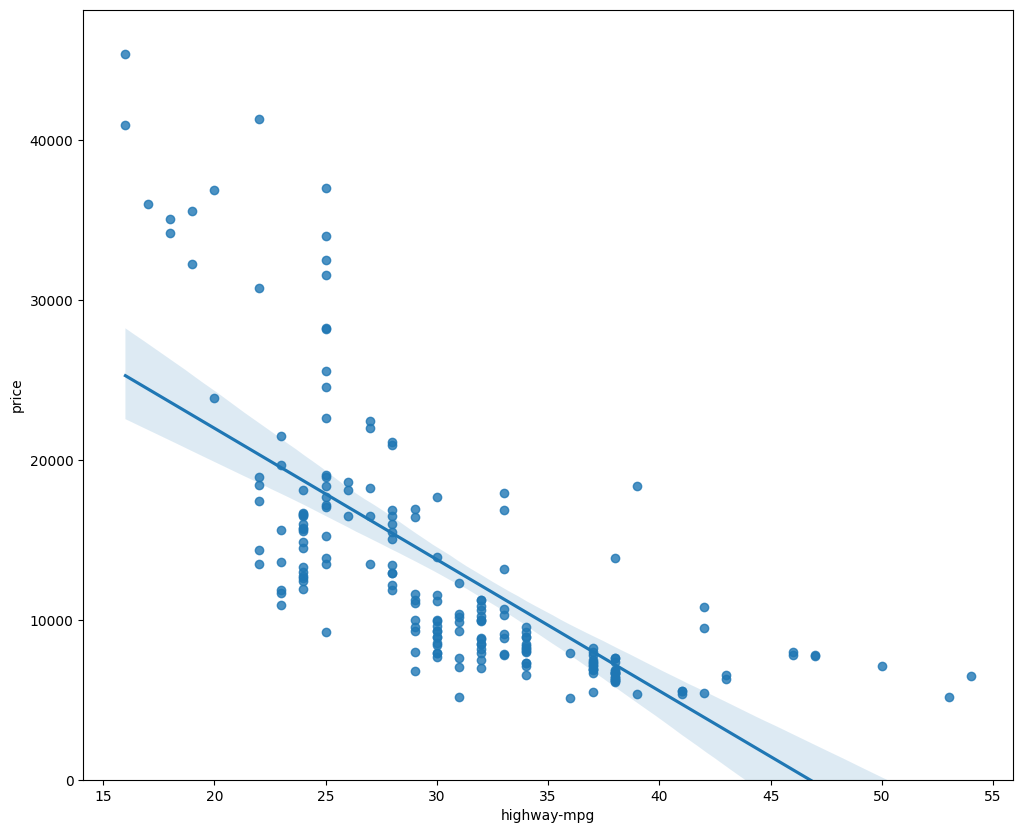

In [298]:
# Regression Plots
# This will plot the data points along with the linear regression line

width = 12
height = 10
pyplot.figure(figsize=(width,height))
sns.regplot(x='highway-mpg', y='price', data=df)
pyplot.ylim(0,)

(0.0, 47414.1)

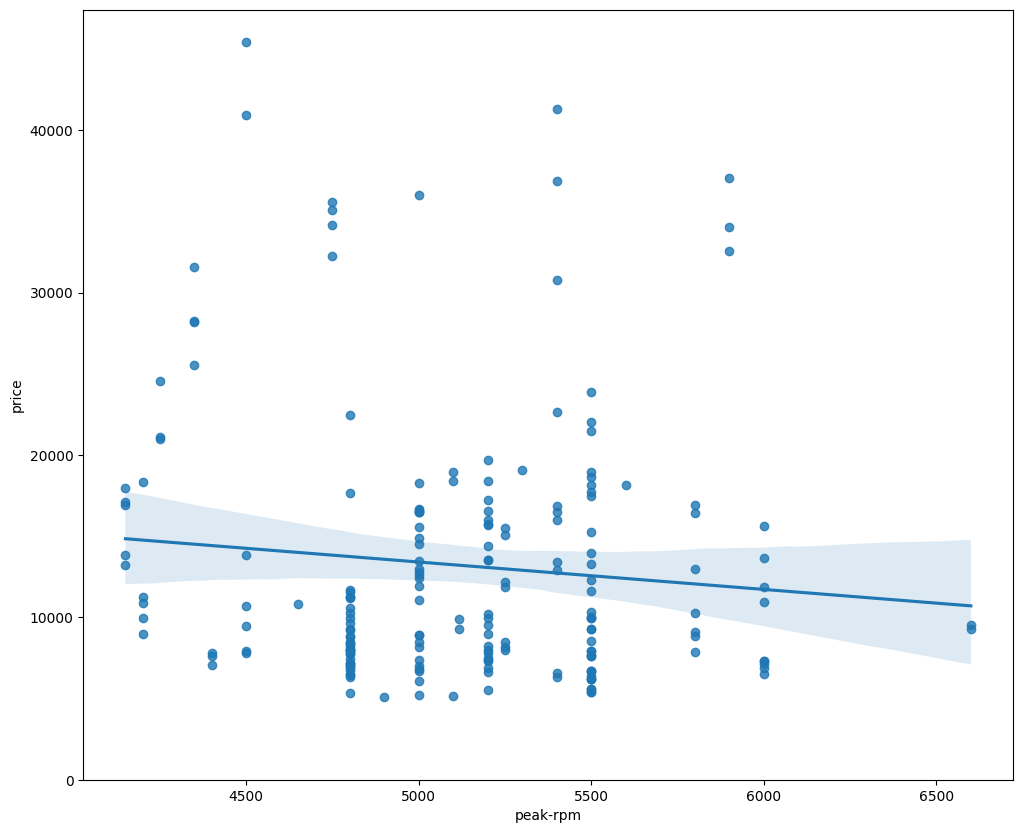

In [299]:
pyplot.figure(figsize=(width,height))
sns.regplot(x='peak-rpm', y='price', data=df)
pyplot.ylim(0,)

(0.0, 22450.668458176646)

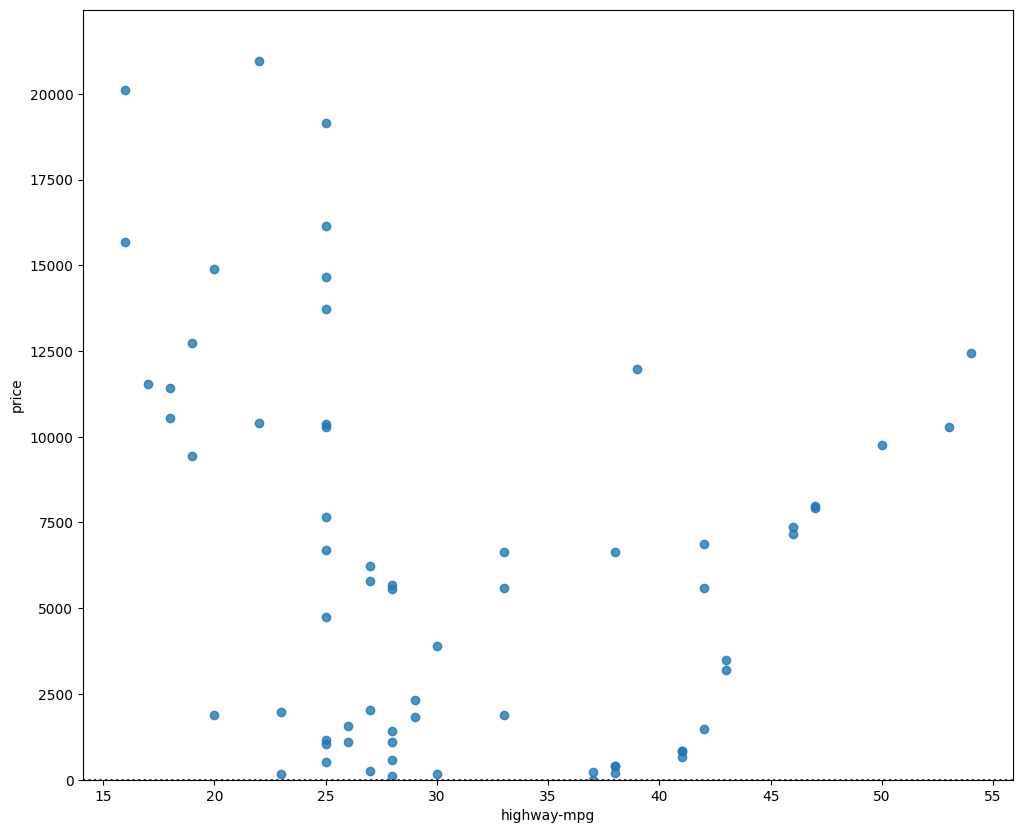

In [300]:
# Residual Plots
# This will display the difference between the expected value and
# the observed value (the residual). The residual is the distance
# between the point and the line

pyplot.figure(figsize=(width,height))
sns.residplot(x='highway-mpg', y='price', data=df)
pyplot.ylim(0,)

(0.0, 33130.84727045586)

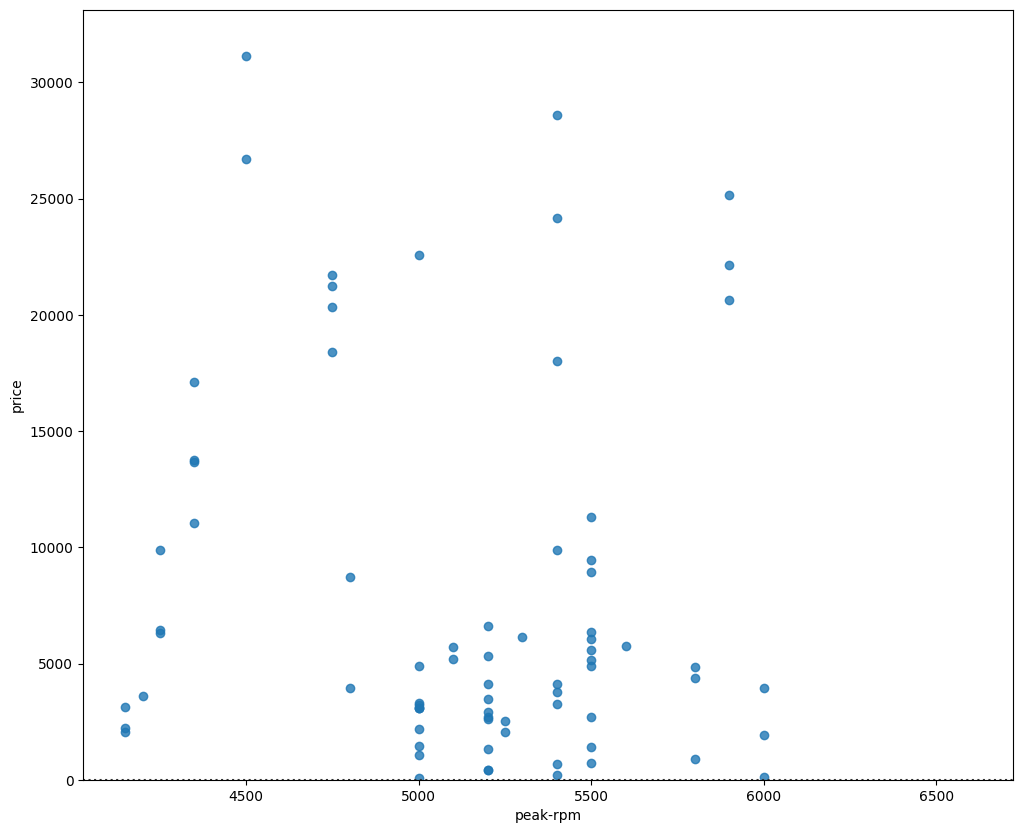

In [301]:
pyplot.figure(figsize=(width,height))
sns.residplot(x='peak-rpm', y='price', data=df)
pyplot.ylim(0,)

In [302]:
# Since the data in both plots are not clustered around the X axis
# we can assume that a SLR will not be sufficient and we may need a
# non-linear model

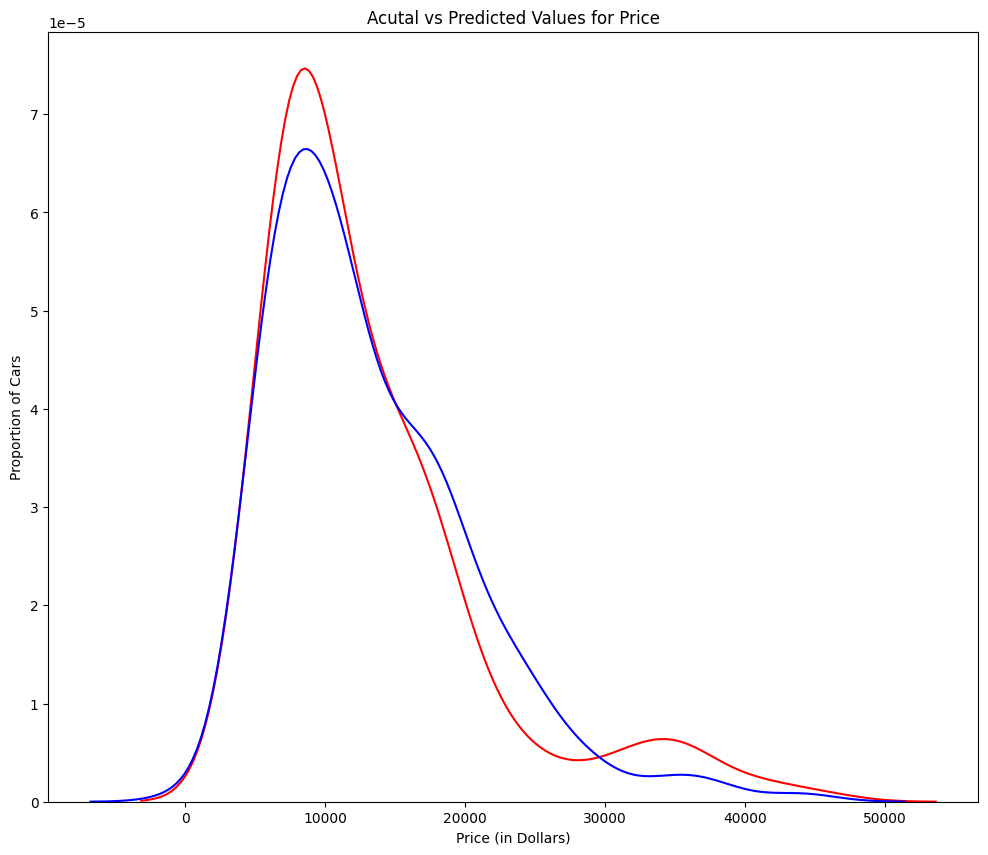

In [303]:
# MLR Graphs
# Distribution plot
# Shows the distribution between the actual values with the predicted values

# Creating a Distribution Plot using the first MLR example

Y_hat = lm.predict(Z)
pyplot.figure(figsize=(width,height))

# The below code will create two plots and then lay them on top of each other
# Use hist=False to display useful data

ax1 = sns.distplot(df['price'], hist=False, color='r', label='Actual Value')
sns.distplot(Y_hat, hist=False, color='b', label='Predicted Value', ax=ax1)

pyplot.title('Acutal vs Predicted Values for Price')
pyplot.xlabel('Price (in Dollars)')
pyplot.ylabel('Proportion of Cars')

pyplot.show()
pyplot.close()

In [304]:
# Polynomial Regression and Pipelines
# Polynomial regression helps predict values that are non-linear
# Quadratic, cubic, etc.

# Use the following function to plot data

def pollyplot(model, independent_var, dependent_var, name):
  x_new=np.linspace(15,55,100)
  y_new = model(x_new)

  pyplot.plot(independent_var, dependent_var, '.', x_new, y_new, '-')
  pyplot.title('Polynomial Fit with Matplotlib for Price ~ Length')
  ax = pyplot.gca()
  ax.set_facecolor((0.898, 0.898, 0.898))
  fig = pyplot.gcf()
  pyplot.xlabel(name)
  pyplot.ylabel('Price of Cars')

  pyplot.show()
  pyplot.close()


In [305]:
# Generate variables

x = df['highway-mpg']
y = df['price']

# Use polyfit to create a polynomial function
# Third argument is the order
# (2 is quadratic, 3 is cubic, etc.)

f = np.polyfit(x, y, 3)
p = np.poly1d(f)

print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


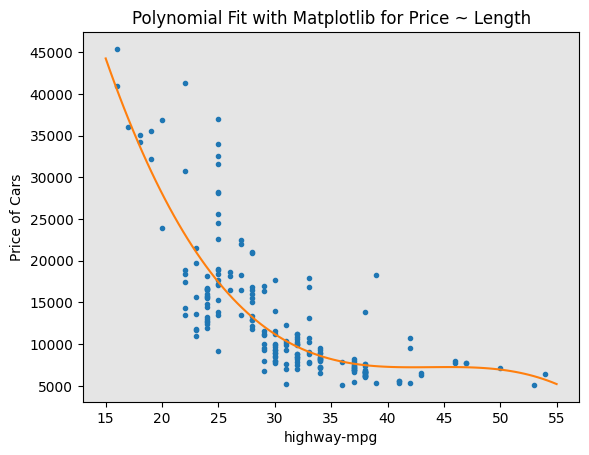

In [306]:
# Pass above values into function and return the graph

pollyplot(p, x, y, 'highway-mpg')

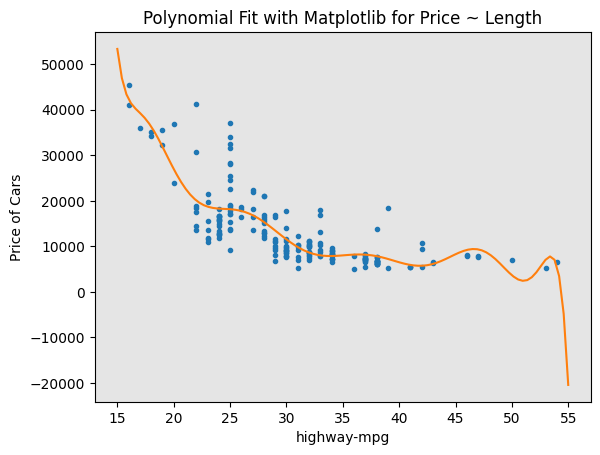

In [307]:
# Let's try the same, but with 11th order function for fun

f = np.polyfit(x, y, 11)
p = np.poly1d(f)

pollyplot(p, x, y, 'highway-mpg')

In [308]:
# Transformin polynomials

# Create a PolynomialFeatures object of the second order

pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [309]:
# Pass the MLR data we created earlier

Z_pr = pr.fit_transform(Z)

In [310]:
# Shape will return a tuple with (rows, columns)

Z.shape

(201, 4)

In [311]:
Z_pr.shape

(201, 15)

In [312]:
# Pipelines
# Pipelines simplify the process of processinhg data
# The Pipeline module can create a pipeline
# The StandardScales is another useful model in pipeline creation

# Here we are creating a pipeline to scale, generate a polynomial and then
# output a regression model

pipeline_input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)),
                  ('model', LinearRegression())]

# Assign the input to a variable

pipe=Pipeline(pipeline_input)

In [313]:
# Convert the data to a float to avoid conversion warnings
# By calling the pipeline, we run the data through all the steps in one call

Z_pipe = Z.astype(float)
pipe.fit(Z_pipe, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [314]:
# We can also generate predictive outputs

y_pipe = pipe.predict(Z_pipe)
y_pipe[0:4]

array([13103.67557905, 13103.67557905, 18229.84126783, 10394.17656982])

In [315]:
# In-sample evaluation
# Mathematics has give us two great statistical ways to evaluate the
# accuracy of a given model
# R Squared and Mean Squared Error

In [316]:
# R Squared
# aka the "Coefficient of Determination"
# Measures how closely the data fits the line of regression
# Typically between 0 and 1 (higher is better)
# This means it is read as a percentage

# SLR

lm.fit(X, Y)
print(f'The R Squared value of Highway MPG and Price is {lm.score(X, Y)}')

The R Squared value of Highway MPG and Price is 0.7609686443622008


In [317]:
# Mean Squared Error
# This is literally the mean of the squared error differential

# SLR

Yhat = lm.predict(X)
print(f'The first four predicted outputs is {Yhat[0:4]}')
mse = mean_squared_error(df['price'], Yhat)
print(f'The mean squared error for this model is {mse}')

The first four predicted outputs is [[13728.4631336 ]
 [13728.4631336 ]
 [17399.38347881]
 [10224.40280408]]
The mean squared error for this model is 15021126.025174143


In [318]:
# R Squared - MLR

lm.fit(Z, df['price'])
print(f'The R Squared value of {Z} and Price is', lm.score(Z, df['price']))

The R Squared value of      horsepower  curb-weight  engine-size  highway-mpg
0           111         2548          130           27
1           111         2548          130           27
2           154         2823          152           26
3           102         2337          109           30
4           115         2824          136           22
..          ...          ...          ...          ...
200         114         2952          141           28
201         160         3049          141           25
202         134         3012          173           23
203         106         3217          145           27
204         114         3062          141           25

[201 rows x 4 columns] and Price is 0.8094390422815301


In [319]:
# MSE - MLR
Y_predict_multifit = lm.predict(Z)
print('The mean squared error for this model is', mean_squared_error(df['price', Y_predict_multifit]))

InvalidIndexError: ('price', array([13698.95609311, 13698.95609311, 19056.78572196, 10621.59764327,
       15519.32197778, 13867.78444008, 15454.84783873, 15972.88040209,
       17614.41285158, 10723.08344825, 10723.08344825, 17804.21572846,
       18063.23201014, 19319.30373461, 26972.27689965, 27678.68494059,
       28194.2579827 ,   656.80024158,  5651.63043174,  5816.45897463,
        5480.62393393,  5370.97344591,  8741.42975453,  5799.52765742,
        5903.13417009,  5903.13417009,  9038.12113173, 11861.57965459,
       18769.99450146,  4814.41324913,  5694.73017907,  4008.30220222,
        6118.36534807,  6193.71553911,  6448.02243385,  6513.953851  ,
        9478.44648129,  9728.04398909,  9798.68479319, 10118.92310508,
       11179.08237469, 10425.05583592,  9460.04012779, 12625.18443424,
       34468.55313589, 34468.55313589, 44002.46473187,  5262.49972603,
        5565.44473413,  5588.99166883,  5777.36714641,  5800.91408111,
        7338.1936047 ,  7338.1936047 ,  7361.7405394 , 10542.30414201,
       11013.6220463 , 11131.35671979, 11013.6220463 , 11131.35671979,
       10579.01865208, 11201.99752389, 15570.92357498, 13086.33241295,
       23140.42070489, 24247.1266357 , 23046.2329661 , 24341.31437449,
       29815.12685423, 29556.11057255, 38078.74428472, 36881.72369422,
       19542.96197696,  5841.31018873,  5854.10376114,  6136.66697752,
        8821.4893325 , 11609.72803836, 10959.83688344, 18873.60101414,
       19288.02706482, 19311.57399952, 11134.0842002 , 11322.45967779,
       11765.13780737, 11765.13780737,  6019.42979831,  6834.78482692,
        6156.00201956,  6250.18975835,  6655.19703516,  6311.41178856,
        6674.03458292,  6405.59952736,  6716.41906537,  6579.84684412,
       11334.16991624, 11230.56340357, 22446.1474209 , 23392.73419576,
       22390.96936603, 22872.07240775, 25265.7093212 , 23192.31071964,
       14246.40159948, 17907.86165891, 15235.3728568 , 18712.74751446,
       14398.09293482, 18166.87794059, 15387.06419213, 18971.76379613,
       14505.41788116, 18166.87794059, 18319.48947897,  5678.41818539,
        8741.42975453,  5799.52765742,  5903.13417009,  7505.99834524,
       11861.57965459, 18802.96021004, 18209.68026579, 24969.54978257,
       24969.54978257, 25176.76280792, 13724.73995688, 13164.32291107,
       13466.86233094, 13641.10964771, 13697.62229099, 13937.80102491,
       16783.29370517, 16966.95979581,  6741.09093291,  7998.55311637,
        8563.67954912,  8818.55102445,  8884.27278604, 10198.08034238,
        9510.20193789, 11801.28767803,  9318.66131733, 10703.10967777,
        9821.23113146, 12241.30087354,  5761.76394931,  5984.23006831,
        5866.49539482,  7077.93277115,  6942.27582718, 10803.97311766,
        7058.74056556,  7190.60339987,  8161.88886478,  8563.94065418,
        7485.4642225 ,  7142.17494206,  7226.94390698,  7363.51612822,
        7528.34467111,  9886.69033431, 10051.5188772 , 15342.37987817,
       15323.54233041, 15394.18313451, 15996.98466278, 16161.81320567,
       17390.9631969 , 11238.16832759,  9929.92474332, 11579.49405293,
       11579.49405293, 11786.70707828, 21627.33294229, 21815.70841988,
       22088.97555207, 21368.70327417,  7188.01115997,  9252.73472175,
        7202.13932079,  9266.86288257,  9563.55425977,  8173.55452253,
       10413.1257055 ,  9550.21868654,  9394.80891753, 14556.47986611,
        9251.79447614, 10971.19462988, 16506.61653967, 17081.16174631,
       16614.93243929, 17118.83684182, 18593.55672053, 19121.00805777,
       16694.99201726, 19510.62582832, 20474.32593713, 17802.91361488,
       17103.3740926 ]))

In [320]:
# R Squared - Polynomial

r_squared = r2_score(y,p(x))
print(r_squared)

0.7023769093756598


In [321]:
# MSE - Polynomial

mean_squared_error(df['price'],p(x))

18703127.63085496

[[-7796.47889059]
 [-7629.6188749 ]
 [-7462.75885921]
 [-7295.89884352]
 [-7129.03882782]]


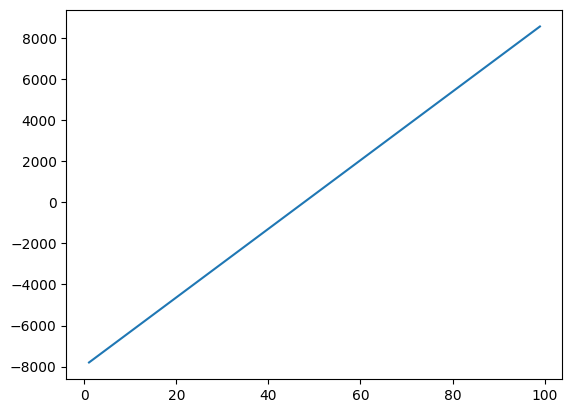

In [322]:
# Prediction and Decision Making
# This is how we pass data and predict outputs

# Create a new input

new_input = np.arange(1, 100, 1).reshape(-1, 1)

# Fit the model

lm.fit(X, Y)

# Produce a prediction

yhat = lm.predict(new_input)
print(yhat[0:5])

# Plot data

pyplot.plot(new_input, yhat)
pyplot.show()

Model Evaluation and Refinement

In [323]:
# Evaluating the models
# Prep Work
# Pull out the numerical data to its own dataframe

numeric_df = df._get_numeric_data()
numeric_df

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,88.6,0.413433,0.324786,0.083333,2548,130,3.47,2.68,...,5000.0,21,27,13495.0,11.190476,8.703704,False,True,True,False
1,3,122,88.6,0.413433,0.324786,0.083333,2548,130,3.47,2.68,...,5000.0,21,27,16500.0,11.190476,8.703704,False,True,True,False
2,1,122,94.5,0.449254,0.444444,0.383333,2823,152,2.68,3.47,...,5000.0,19,26,16500.0,12.368421,9.038462,False,True,True,False
3,2,164,99.8,0.529851,0.504274,0.541667,2337,109,3.19,3.40,...,5500.0,24,30,13950.0,9.791667,7.833333,False,True,True,False
4,2,164,99.4,0.529851,0.521368,0.541667,2824,136,3.19,3.40,...,5500.0,18,22,17450.0,13.055556,10.681818,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,109.1,0.711940,0.735043,0.641667,2952,141,3.78,3.15,...,5400.0,23,28,16845.0,10.217391,8.392857,False,True,True,False
201,-1,95,109.1,0.711940,0.726496,0.641667,3049,141,3.78,3.15,...,5300.0,19,25,19045.0,12.368421,9.400000,False,True,False,True
202,-1,95,109.1,0.711940,0.735043,0.641667,3012,173,3.58,2.87,...,5500.0,18,23,21485.0,13.055556,10.217391,False,True,True,False
203,-1,95,109.1,0.711940,0.735043,0.641667,3217,145,3.01,3.40,...,4800.0,26,27,22470.0,9.038462,8.703704,True,False,False,True


In [324]:
# Distribution Plot Function

def distribution_plot(red_function, blue_function, red_name, blue_name, title):
  width = 12
  height = 10
  pyplot.figure(figsize=(width, height))

  ax1 = sns.kdeplot(red_function, color='r', label=red_name)
  ax2 = sns.kdeplot(blue_function, color='b', label=blue_name)

  pyplot.title(title)
  pyplot.xlabel('Price ($)')
  pyplot.ylabel('Proportion of Cars')
  pyplot.show()
  pyplot.close()

In [325]:
# PolyPlot Function
# Slightly different from the above instance, so this is v2
# Parameters are the training data, testing data, the linear regression object
# and the polynomial transformation object

def polyplotv2(xtrain, xtest, ytrain, ytest, lr, poly_transform):
  wigth = 12
  height = 10
  pyplot.figure(figsize=(width, height))

  xmax = max([xtrain.values.max(), xtest.values.max()])
  xmin = min([xtrain.values.min(), xtest.values.min()])
  x = np.arange(xmax, xmin, 0.1)

  pyplot.plot(xtrain, ytrain, 'ro', label='Training Data')
  pyplot.plot(xtest, ytest, 'go', label='Test Data')
  pyplot.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))),
              label='Predicted Function')
  pyplot.ylim([-10000, 60000])
  pyplot.ylabel('Price')
  pyplot.legend()

In [326]:
# Establish the data we will be working with

y_data = numeric_df['price']
x_data = numeric_df.drop('price', axis=1)

In [327]:
# Generate testing and training splits

xtrain, xtest, ytrain, ytest = train_test_split(x_data, y_data, test_size=0.1,
                                                random_state=1)

print(f"The number of test samples is {xtest.shape[0]}")
print(f"The number of training samples is {xtrain.shape[0]}")

The number of test samples is 21
The number of training samples is 180


In [328]:
# Generate a backup testing and training split

xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x_data, y_data,
                                                    test_size=0.4,
                                                    random_state=1)

print(f"The number of test samples is {xtest1.shape[0]}")
print(f"The number of training samples is {xtrain1.shape[0]}")

The number of test samples is 81
The number of training samples is 120


In [329]:
# Create and fit models using the Linear Regression Object

lre = LinearRegression()

lre.fit(xtrain[['horsepower']], ytrain)
print('R Squared on test data', lre.score(xtest[['horsepower']], ytest))
print('R Squared on training data', lre.score(xtrain[['horsepower']], ytrain))

R Squared on test data 0.36339478087886834
R Squared on training data 0.6622424809407366


In [330]:
lre.fit(xtrain1[['horsepower']], ytrain1)
print('R Squared on test data', lre.score(xtest1[['horsepower']], ytest1))
print('R Squared on training data', lre.score(xtrain1[['horsepower']], ytrain1))

R Squared on test data 0.6115381265345778
R Squared on training data 0.6757311544174884


In [331]:
# Cross validation
# Splits data into folds and tests against itself
# Folds are even splits and denoted by the cv argument

r_cross4 = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)
print(r_cross4)
print(f'The mean of the folds are {r_cross4.mean()} and the standard deviation \
is {r_cross4.std()}.')

[0.77477095 0.51725019 0.74924821 0.04771764]
The mean of the folds are 0.5222467481979474 and the standard deviation is 0.29176230741826353.


In [332]:
# Negative Squared Error

nse4 = -1 * cross_val_score(lre, x_data[['horsepower']], y_data, cv=4,
                           scoring='neg_mean_squared_error')
nse4

array([20240865.23167852, 43737944.37864213, 12470270.77569642,
       17574447.8797166 ])

In [333]:
# R Cross and NSE with 2 Folds

r_cross2 = cross_val_score(lre, x_data[['horsepower']], y_data, cv=2)
print(r_cross2)
print(f'The mean of the folds are {r_cross2.mean()} and the standard deviation \
is {r_cross2.std()}.')

nse2 = -1 * cross_val_score(lre, x_data[['horsepower']], y_data, cv=2,
                           scoring='neg_mean_squared_error')
print(nse2)

[0.59038906 0.44448529]
The mean of the folds are 0.5174371732192354 and the standard deviation is 0.0729518864766161.
[36960262.7298912  19078529.14706752]


In [334]:
# Predicting output with cross_val_predict

yhat4 = cross_val_predict(lre, x_data[['horsepower']], y_data, cv=4)
yhat4[0:5]

array([14144.56553323, 14144.56553323, 20819.140433  , 12747.56148444,
       14765.45622158])

In [335]:
# Overfitting, underfitting, and model selection
# To demonstrate, we will create some MLR objects and train the models

lre.fit(xtrain[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], ytrain)


LinearRegression()

In [336]:
yhat_training = lre.predict(xtrain[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_training[0:5]

array([ 7425.12006788, 28327.02313301, 14210.29915814,  4054.61292262,
       34498.57562361])

In [337]:
yhat_training1 = lre.predict(xtrain1[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_training1[0:5]

array([25432.81259963,  8422.06522748, 25432.81259963, 19436.97372649,
        5975.91034319])

In [338]:
yhat_test = lre.predict(xtest[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11350.96269501,  5884.81415149, 11206.85674887,  6640.86207975,
       15566.72516819])

In [339]:
yhat_test1 = lre.predict(xtest1[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test1[0:5]

array([11350.96269501,  5884.81415149, 11206.85674887,  6640.86207975,
       15566.72516819])

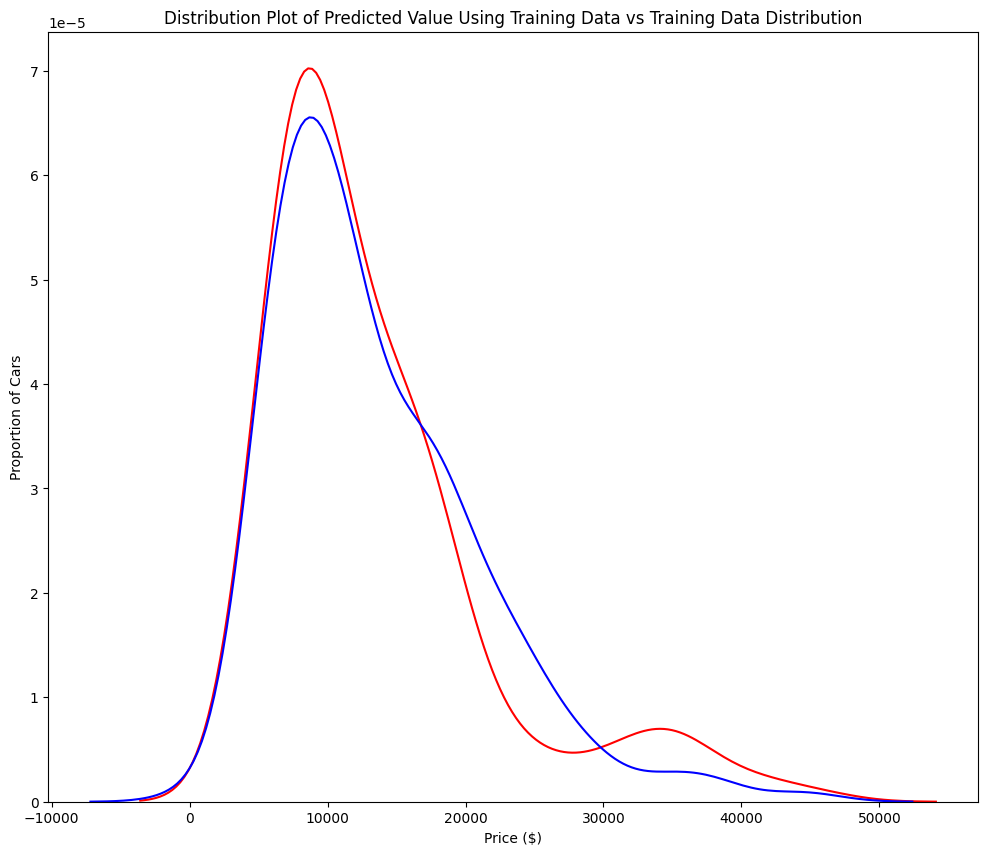

In [340]:
# Plotting our data

title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'
distribution_plot(ytrain, yhat_training, 'Actual Values (Train)', 'Predicted Values (Train)', title)

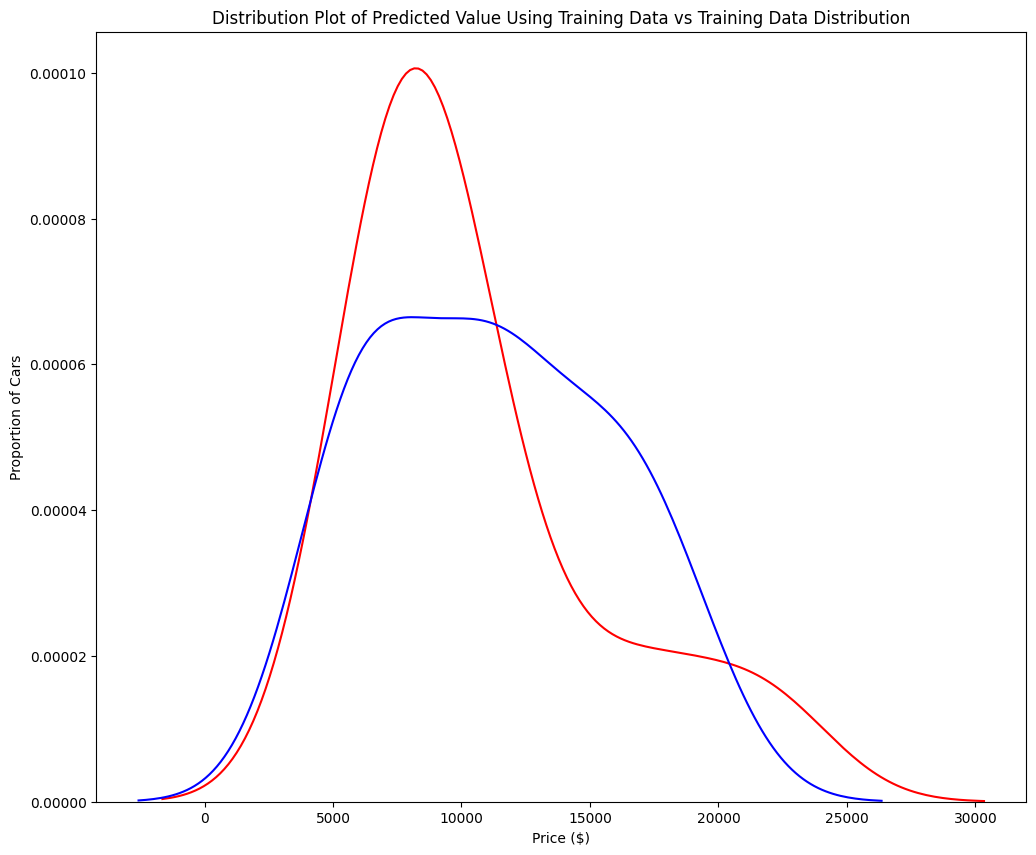

In [341]:
distribution_plot(ytest, yhat_test, 'Actual Values (Test)', 'Predicted Values (Test)', title)

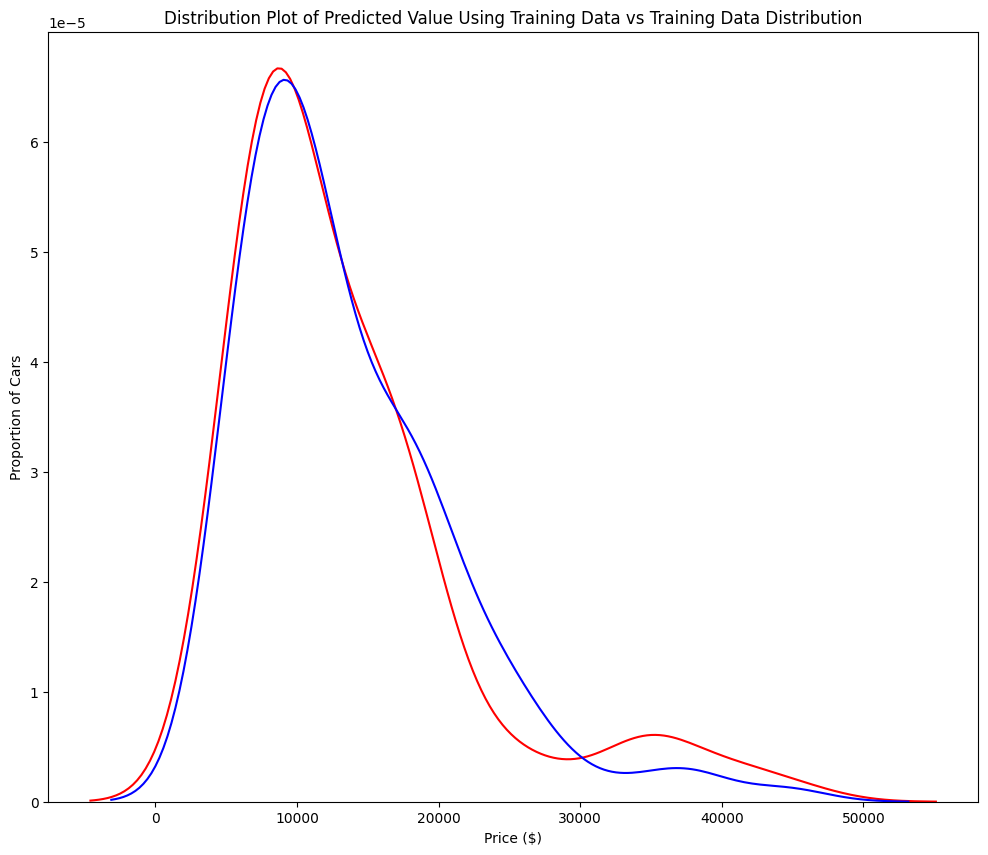

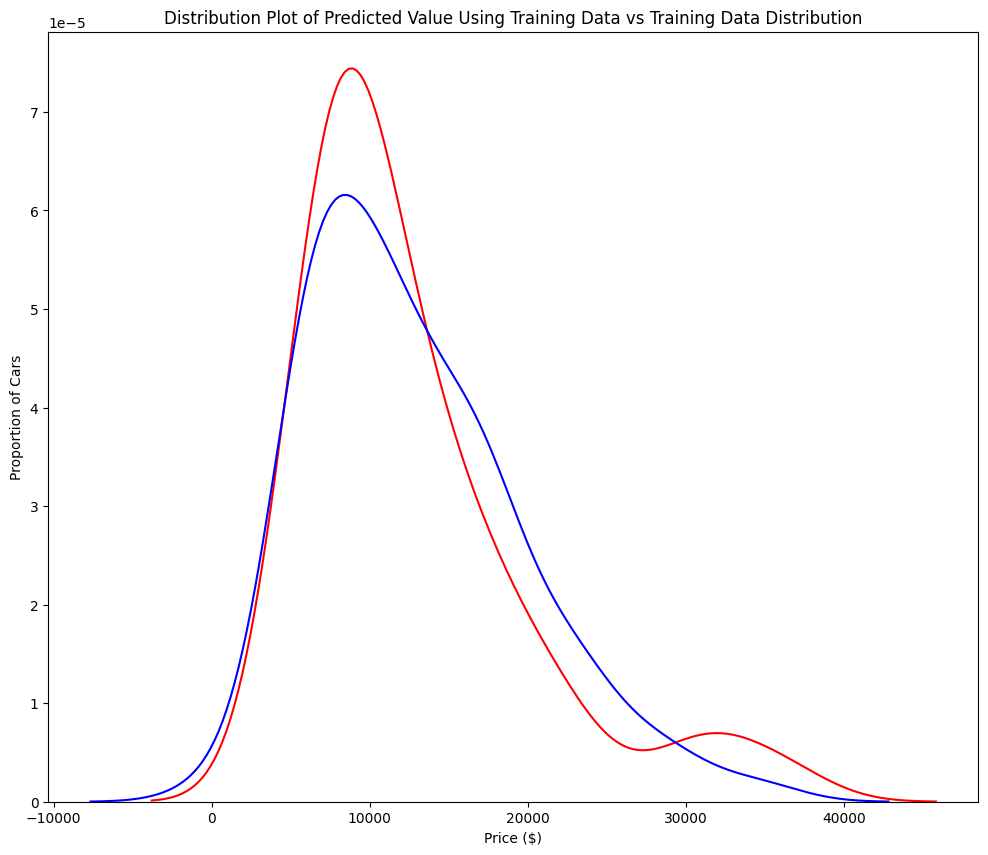

In [342]:
distribution_plot(ytrain1, yhat_training1, 'Actual Values (Train)', 'Predicted Values (Train)', title)
distribution_plot(ytest1, yhat_test1, 'Actual Values (Test)', 'Predicted Values (Test)', title)

In [343]:
# Let's overfit some data
# This is where we over-complicate the data to fit the outliers
# rather than creating models to fit the trend

# We're gonna use a 5th order polynomial
# We're also gonna use xtrain/test 1 for a better split of data

pr = PolynomialFeatures(degree=5)
xtrain1_pr = pr.fit_transform(xtrain1[['horsepower']])
xtest1_pr = pr.fit_transform(xtest1[['horsepower']])
pr

lre.fit(xtrain1_pr, ytrain1)
lre.fit(xtest1_pr, ytest1)

LinearRegression()

In [344]:
# Generate Predictions
prediciton = lre.predict(xtest1_pr)
prediciton[0:5]

array([11909.81490504,  7326.10659937,  9000.92627927,  7894.89493461,
       16818.15972646])

In [345]:
# Compare predictions to actual outputs
print('Predictions', prediciton[0:4])
print('Actual vales', ytest1[0:4].values)

Predictions [11909.81490504  7326.10659937  9000.92627927  7894.89493461]
Actual vales [ 9549.  6229. 10245.  7295.]


ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by PolynomialFeatures.

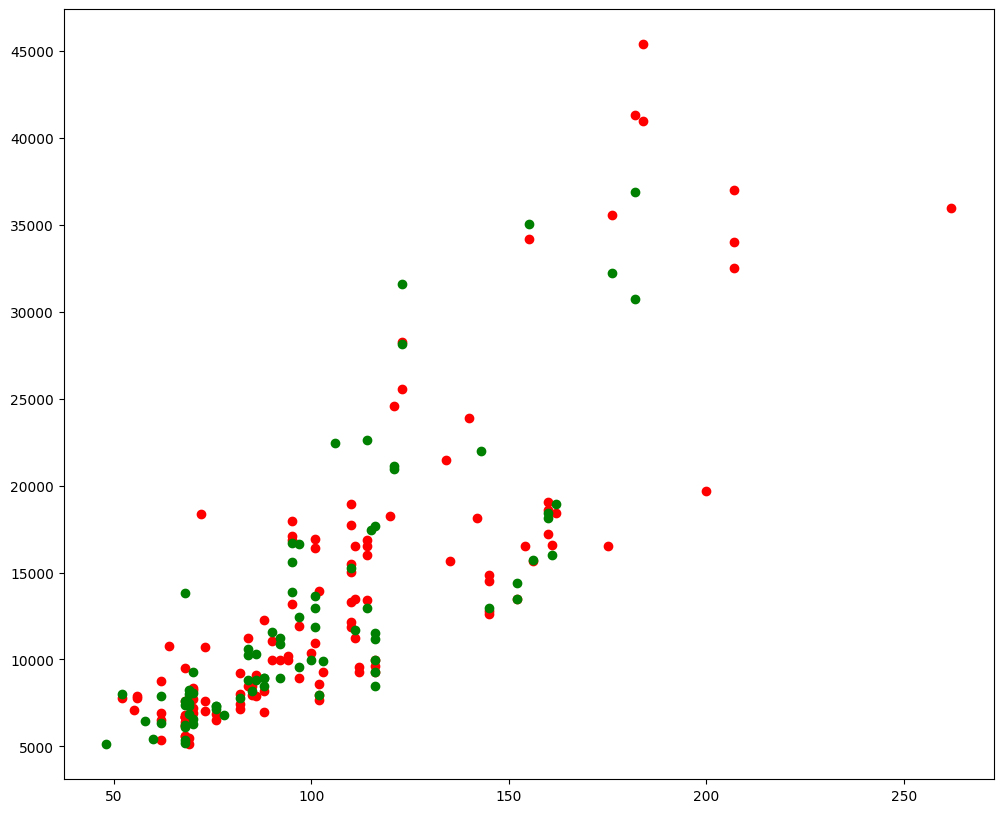

In [346]:
# Plot the data

polyplotv2(xtrain1['horsepower'], xtest1['horsepower'], ytrain1, ytest1, lre, pr)

In [ ]:
# Score models
# Negative R Squared is a sign of overfitting - hint

print(lre.score(xtrain1_pr, ytrain1))
print(lre.score(xtest1_pr, ytest1))

Text(0.5, 1.0, 'R Squared using Test Data')

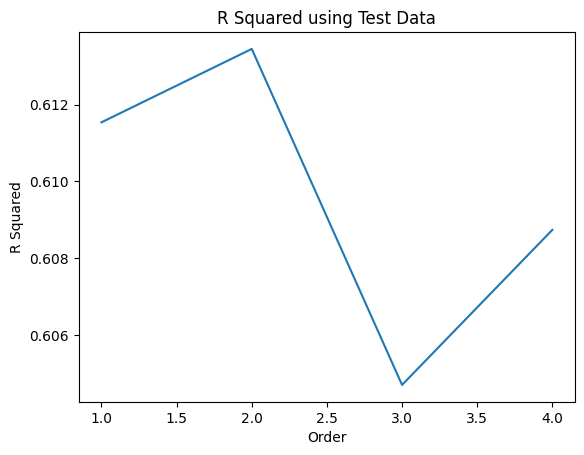

In [347]:
# We know fifth order is overfitted
# So lets try 1 - 4

test_outputs = []

order = [1, 2, 3, 4]
for i in order:
  pr = PolynomialFeatures(degree=i)
  data_x_train = pr.fit_transform(xtrain1[['horsepower']])
  data_x_test = pr.fit_transform(xtest1[['horsepower']])
  lre.fit(data_x_train, ytrain1)
  test_outputs.append(lre.score(data_x_test, ytest1))

pyplot.plot(order, test_outputs)
pyplot.xlabel('Order')
pyplot.ylabel('R Squared')
pyplot.title('R Squared using Test Data')

In [348]:
# Streamlined function to test different orders and data sizes

def variant_data_test(order, test_data):
  x_base_train, x_base_test, y_base_train, y_base_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
  pf = PolynomialFeatures(degree=order)
  x_train = pf.fit_transform(x_base_train[['horsepower']])
  x_test = pf.fit_transform(x_base_test[['horsepower']])
  poly = LinearRegression()
  poly.fit(x_train, y_base_train)
  polyplotv2(x_base_train['horsepower'], x_base_test['horsepower'], y_base_train, y_base_test, poly, pf)

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.variant_data_test(order, test_data)>

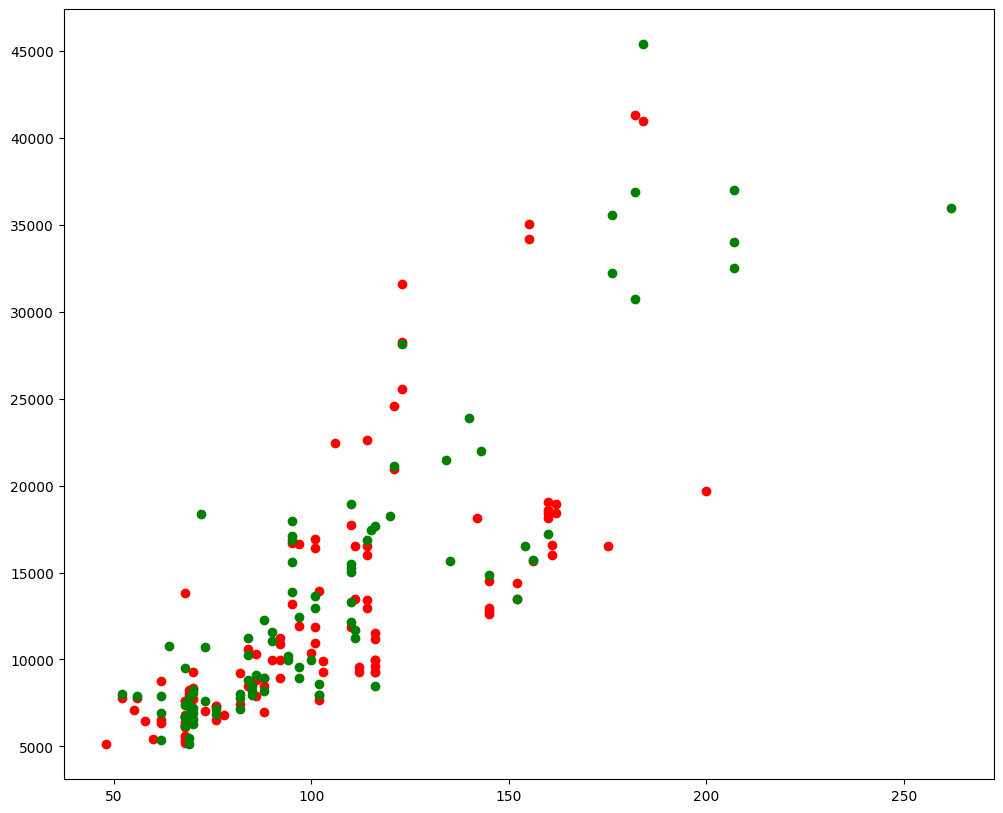

In [349]:
interact(variant_data_test, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

In [350]:
# Polynomial Transformations with multple features

pr1 = PolynomialFeatures(degree=2)
xtrain_pr1 = pr1.fit_transform(xtrain1[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
xtest_pr1 = pr1.fit_transform(xtest1[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])


In [351]:
poly1 = LinearRegression().fit(xtrain_pr1, ytrain1)

In [352]:
yhat_train_pr1 = poly1.predict(xtrain_pr1)
yhat_test_pr1 = poly1.predict(xtest_pr1)

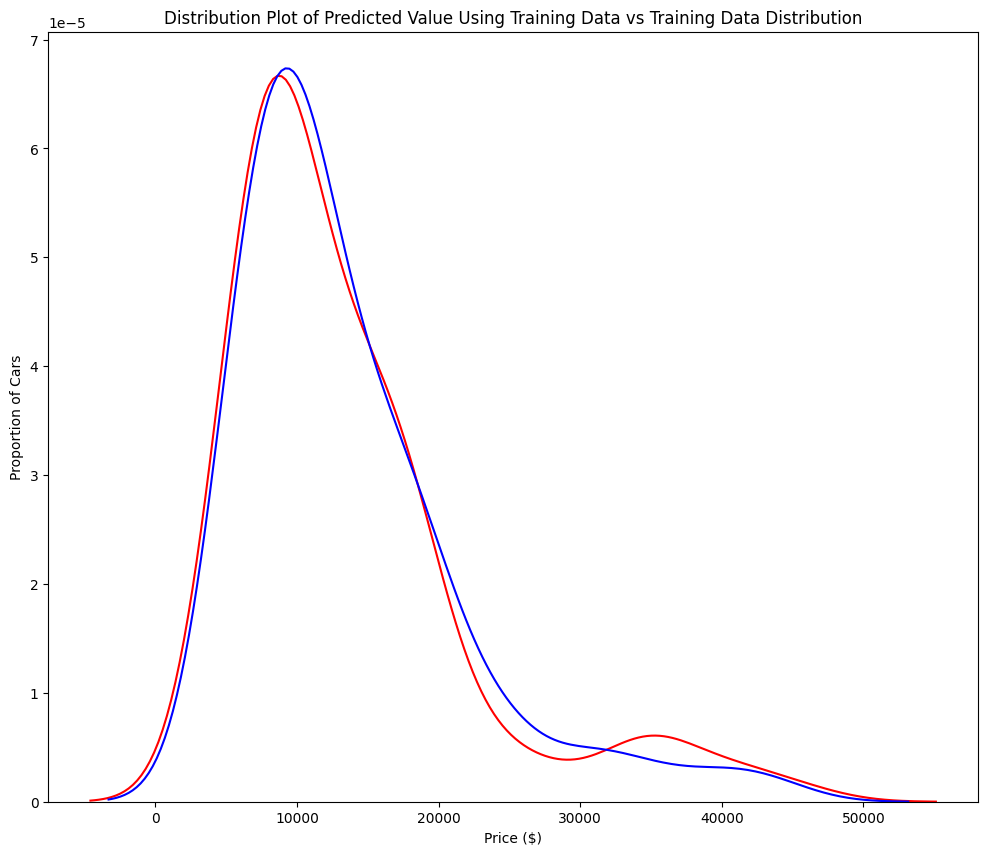

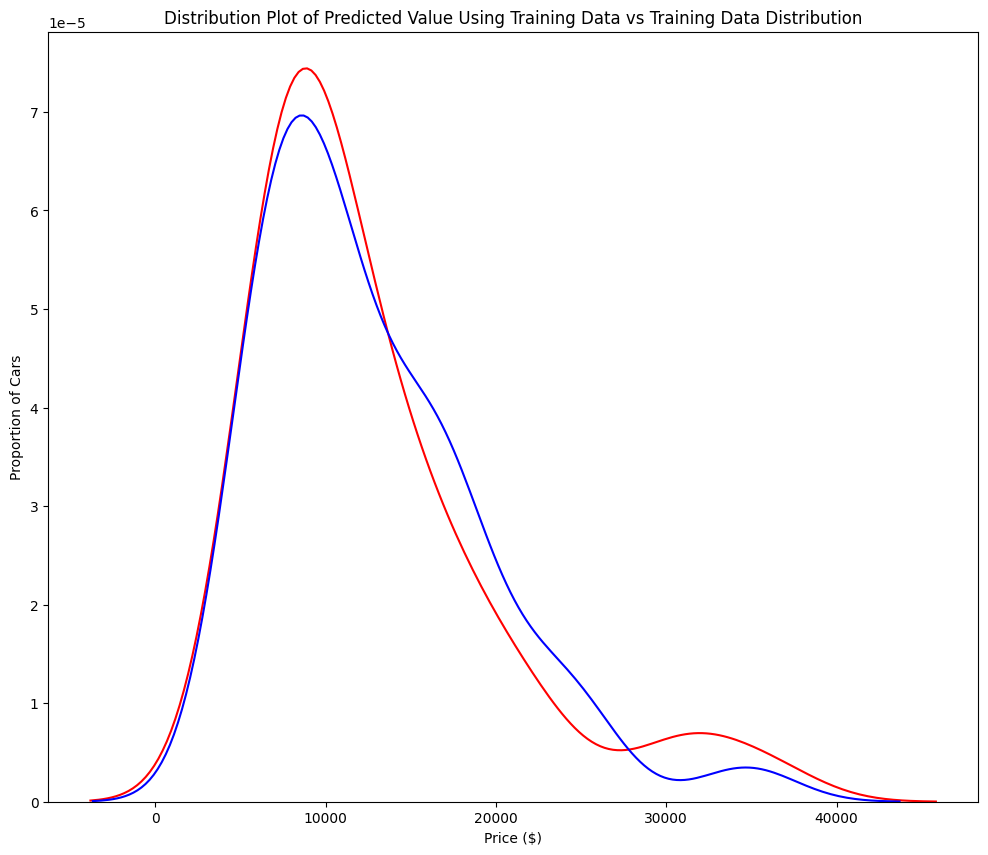

In [353]:
distribution_plot(ytrain1, yhat_train_pr1, "Actual Values (Train)", "Predicted Values (Train)", title)
distribution_plot(ytest1, yhat_test_pr1, "Actual Values (Test)", "Predicted Values (Test)", title)

In [354]:
# Ridge Regression
# Shows has the parameter alpha changes the data

# Create test data

pr=PolynomialFeatures(degree=2)
x_train_ridge=pr.fit_transform(xtrain1[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_ridge=pr.fit_transform(xtest1[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [355]:
# Create Ridge Regression Object with alpha set to 1

ridgemodel = Ridge(alpha=1)

ridgemodel.fit(x_train_ridge, ytrain1)

Ridge(alpha=1)

In [356]:
# Same functions with predictions

yhat_ridge = ridgemodel.predict(x_test_ridge)

print('Predicted values', yhat_ridge[0:4])
print('Test data', ytest1[0:4].values)

Predicted values [ 9273.01843504  6172.98984857 10967.63698499  4398.57621557]
Test data [ 9549.  6229. 10245.  7295.]


In [357]:
# Looping to identify the best alpha value

r2_test = []
r2_train = []
dummy1 = []
alpha = 10 * np.array(range(0,1000))
pbar = tqdm(alpha)

for alpha in pbar:
  ridgemodel = Ridge(alpha=alpha)
  ridgemodel.fit(x_train_ridge, ytrain1)
  test_score, train_score = ridgemodel.score(x_test_ridge, ytest1), ridgemodel.score(x_train_ridge, ytrain1)

  pbar.set_postfix({'Test Score': test_score, 'Train Score': train_score})

  r2_test.append(test_score)
  r2_train.append(train_score)
  dummy1.append(alpha)

100%|██████████| 1000/1000 [00:04<00:00, 246.59it/s, Test Score=0.777, Train Score=0.881]


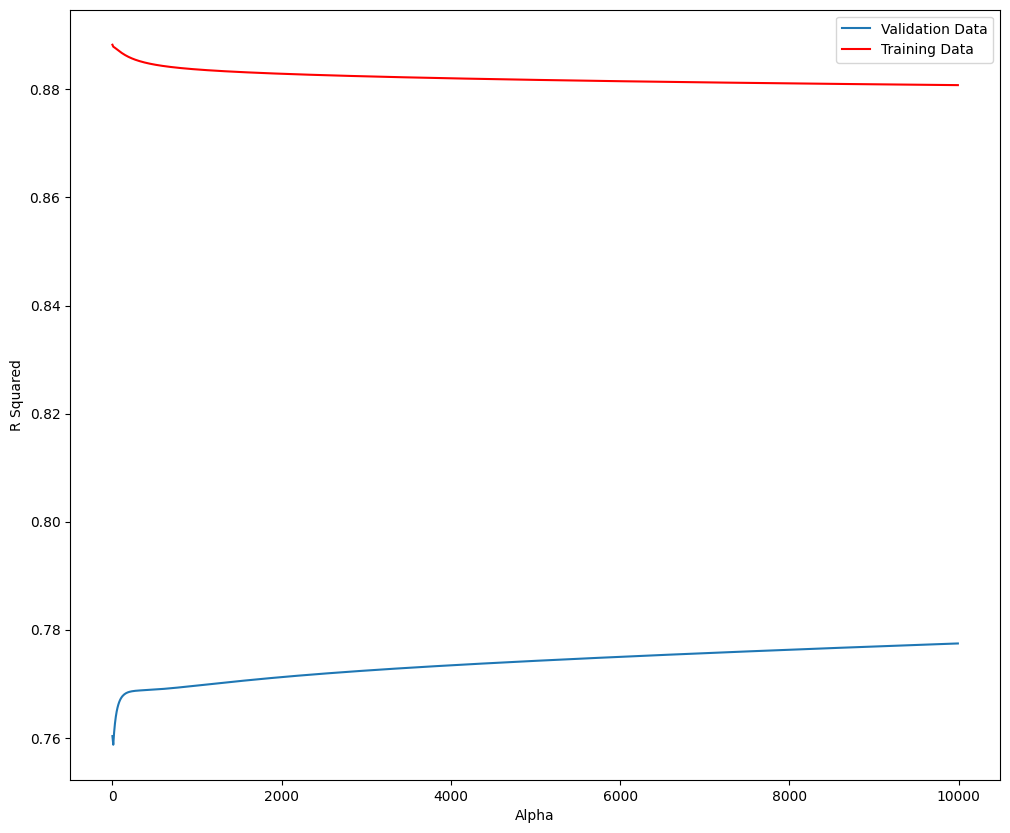

In [358]:
# Plot the results of the loop

width = 12
height = 10
pyplot.figure(figsize=(width,height))

pyplot.plot(dummy1, r2_test, label='Validation Data')
pyplot.plot(dummy1, r2_train, 'r', label='Training Data')
pyplot.xlabel('Alpha')
pyplot.ylabel('R Squared')
pyplot.legend()

In [359]:
# Grid Search
# This is an easier process of finding the best hyperparameter (like alpha)

parameters = [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}]

rr=Ridge()

grid1 = GridSearchCV(rr, parameters, cv=4)

In [360]:
grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    1000000]}])

In [361]:
best_option = grid1.best_estimator_
best_option

Ridge(alpha=10000)

In [362]:
best_option.score(xtest1[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], ytest1)

0.7722509704039529